# Drishti- Model
For this notebook, we will explore the Car Object Detection dataset and try to create bounding boxes with a certain accuracy. We will go through the dataset and do some Exploratory Data Analysis to get an understanding of hte data we are dealing with. after some EDA, we will look through the dataset and determine how to train out convolutional neural network and with what confidence we can give an estiamte of objects present int he input image given byt the user.

## Abstract
Car detection datasets play a crucial role in the development and evaluation of computer vision models, particularly in the domain of autonomous driving and traffic surveillance systems. This abstract provides a comprehensive analysis of several prominent car detection datasets, focusing on their characteristics, challenges, and applications.

This also highlights the specific challenges posed by car detection tasks, including occlusions, varying lighting conditions, and complex urban environments. We will explore how these challenges are addressed within different datasets and the implications for algorithmic performance and generalization.

Additionally, this will discuss the applications of car detection datasets beyond autonomous driving, including traffic management, urban planning, and security surveillance. It will emphasizes the importance of diverse and representative datasets in ensuring the robustness and reliability of computer vision models deployed in real-world scenarios.




In [1]:
#importing required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cv2
import matplotlib.patches as patches


2024-04-22 23:55:23.403973: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-22 23:55:23.404086: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-22 23:55:23.510863: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Now we can look at the representation of how are bounding boxes are defined for the results that we extract from a certain image. For this notebook, the scope is limited to detecting car objects on the road, hence we can see the use of four coordinates namely `xmin`, `xmax`, `ymin` and `ymax` for represening the bounding box created per image.

In [2]:
df = pd.read_csv('../input/car-object-detection/data/train_solution_bounding_boxes (1).csv')
df.head()

,image,xmin,ymin,xmax,ymax
0,vid_4_1000.jpg,281.259045,187.035071,327.727931,223.225547
1,vid_4_10000.jpg,15.163531,187.035071,120.329957,236.430180
2,vid_4_10040.jpg,239.192475,176.764801,361.968162,236.430180
3,vid_4_10020.jpg,496.483358,172.363256,630.020260,231.539575
4,vid_4_10060.jpg,16.630970,186.546010,132.558611,238.386422


We will now look at a few images with their respective boundign boxes in order to preform how the result set needs to be. For this case we can see by the green box that the objects are captured with the help of bounding box as shown below.

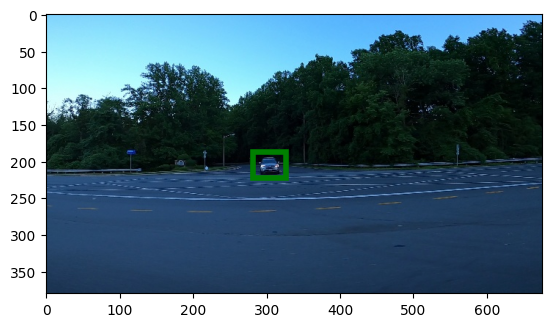

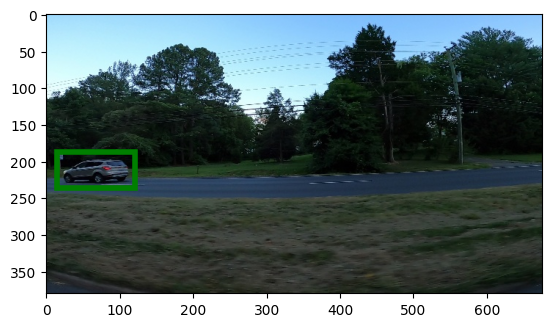

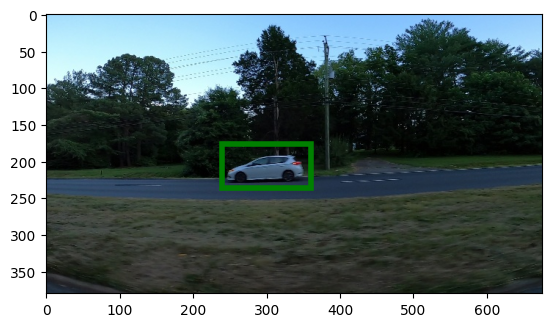

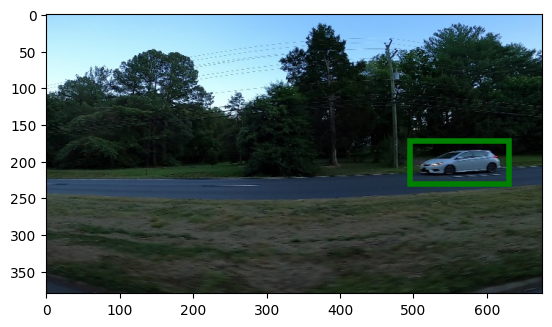

In [3]:
IMAGES_SIZE = 3
for i in df.values:
  photo=plt.imread(f'../input/car-object-detection/data/training_images/{i[0]}')
  pt1=(int(i[1]),int(i[2]))
  pt2=(int(i[3]),int(i[4]))
  fig, ax = plt.subplots()
  rect = patches.Rectangle((pt1[0], pt1[1]), pt2[0]-pt1[0], pt2[1]-pt1[1], linewidth=4, edgecolor='g', facecolor='none')
  ax.add_patch(rect)
  plt.imshow(photo)
  if IMAGES_SIZE == 0:
      break
  IMAGES_SIZE = IMAGES_SIZE - 1


Since we have taken a look at our data and how it performs using CNN, we can now standardize or images to a specific format and then try to train our model on those reduced images. For our object detection model, we will be using YOLOv5 to detect objects present in any of the images. it will provide us with the confidnece and the object that is detected. 

# YOLO

YOLOv5, short for "You Only Look Once version 5," is an object detection algorithm that operates by dividing an image into a grid and predicting bounding boxes and class probabilities for objects within each grid cell.

YOLO uses a convolutional neural network (CNN) to divide an image into a grid and predict bounding boxes, objectness scores, and class probabilities for objects in each grid cell. It incorporates a Feature Pyramid Network (FPN) for multi-scale detection and applies non-maximum suppression to refine the final predictions.








In [6]:
!git clone https://github.com/ultralytics/yolov5
!pip install -U pip setuptools
!pip install -q -U pycocotools


Cloning into 'yolov5'...
remote: Enumerating objects: 16567, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 16567 (delta 22), reused 29 (delta 13), pack-reused 16522
Receiving objects: 100% (16567/16567), 15.08 MiB | 18.19 MiB/s, done.
Resolving deltas: 100% (11379/11379), done.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 54.9 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 894.6/894.6 kB 41.9 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 69.0.3
    Uninstalling setuptools-69.0.3:
      Successfully uninstalled setuptools-69.0.3
  Attempting uninstall: pip
    Found existing installation: pip 23.3.2
    Uninstalling pip-23.3.2:
      Successfully uninstalled pip-23.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.

We need to get the dimensions of the image(s) in order to determine how the downloaded YOLOv5 model willb e trained

In [9]:
image_name = list(set(df.image))
print("Images Present : " , len(image_name))

Images Present :  355


Now we can check the dimension of any image that we want. 

In [23]:
import random
from IPython.display import Image, clear_output
image_1 = cv2.imread("/kaggle/input/car-object-detection/data/training_images/vid_4_1000.jpg")
print("Shape of 1st Image : " , image_1.shape)

Shape of 1st Image :  (380, 676, 3)


Since the image has a length and width of 676X380, we can install the YOLOv5 model with those particular weights in order to get the best

In [24]:
!python yolov5/train.py --batch 2 --epochs 1 --data /input/yolov5-config/car.yaml --cfg /input/yolov5-config/yolov5x.yaml --name yolov5x_fold0_new

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.8/750.8 kB 28.0 MB/s eta 0:00:00
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2024-04-23 01:12:50.681458: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-23 01:12:50.681516: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-23 01:12:50.683044: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: (1) Create a W&B account
wandb: (2) 

In [25]:
!python yolov5/detect.py --weights yolov5/yolov5s.pt --img 676 --conf 0.4 --source /kaggle/input/car-object-detection/data/testing_images


detect: weights=['yolov5/yolov5s.pt'], source=/kaggle/input/car-object-detection/data/testing_images, data=yolov5/data/coco128.yaml, imgsz=[676, 676], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-304-g22361691 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)

100%|███████████████████████████████████████| 14.1M/14.1M [00:00<00:00, 294MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
WARNING ⚠️ --img-size [676, 676] must be multiple of max stride 32, updating to [704, 704]
image 1/175 /kaggle/input/car-object-detection/data/testing_images/vid_5_25100.jpg: 416x704 (no detections), 40.3

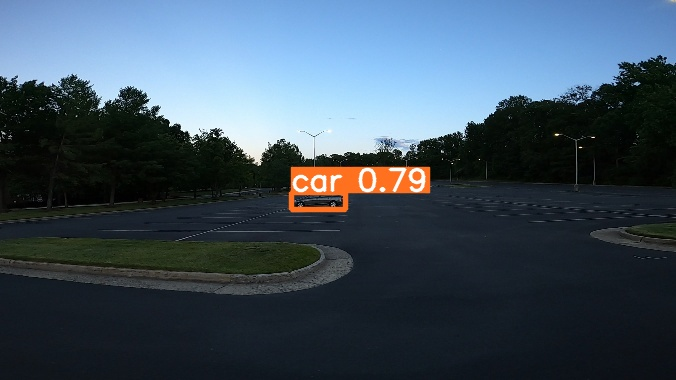

In [34]:
Image(filename = "/kaggle/working/yolov5/runs/detect/exp/vid_5_440.jpg", width = 800, height = 800, retina = False, embed = True)

Since now we have successfully implemented the model with the given weights, we can now use this model in our application to detect user images for objects. 

In [39]:
image = cv2.imread("/kaggle/input/test-image-yolo/View recent photos.jpeg")
print(image.shape)

!python yolov5/detect.py --weights yolov5/yolov5s.pt --img 1290 --conf 0.4 --source /kaggle/input/test-image-yolo


(2796, 1290, 3)
detect: weights=['yolov5/yolov5s.pt'], source=/kaggle/input/test-image-yolo, data=yolov5/data/coco128.yaml, imgsz=[1290, 1290], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-304-g22361691 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
WARNING ⚠️ --img-size [1290, 1290] must be multiple of max stride 32, updating to [1312, 1312]
image 1/1 /kaggle/input/test-image-yolo/View recent photos.jpeg: 1312x608 1 person, 2 cars, 48.2ms
Speed: 0.9ms pre-process, 48.2ms inference, 392.3ms NMS per image at shape (1, 3, 1312, 1312)
Resul

As we can see the model detects 1 person and 2 cars, we can now obtain this image and see what all objects ahve been detected using the YOLOv5 model. This image sample has been used from a video screenshot and the model performas as expected. 

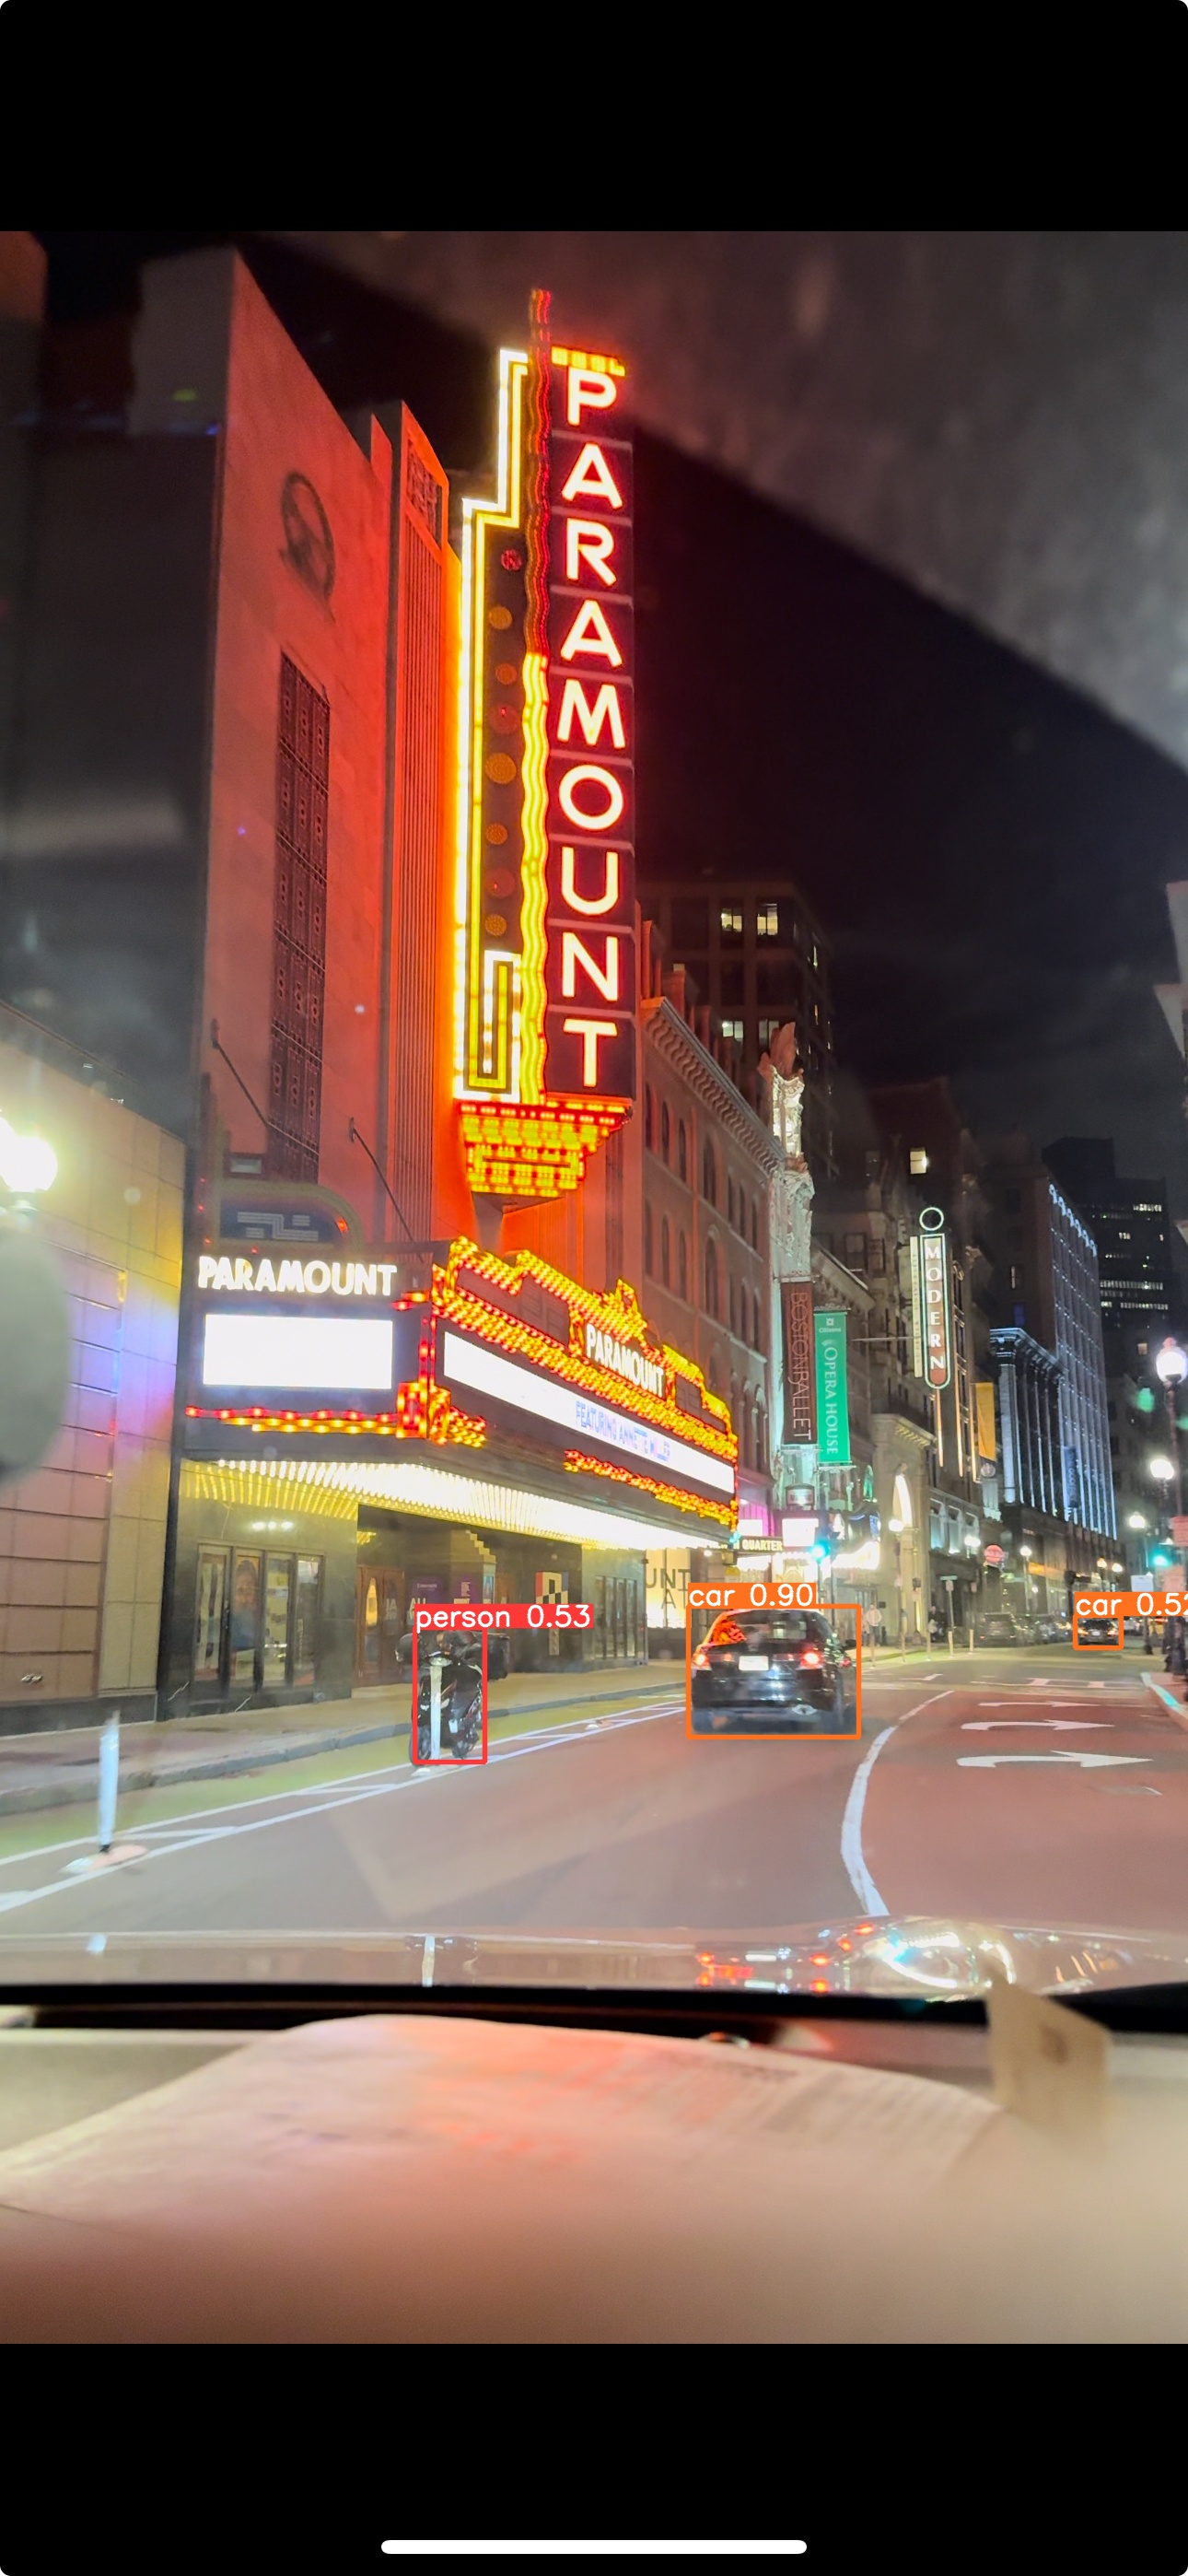

In [40]:
Image(filename = "/kaggle/working/yolov5/runs/detect/exp5/View recent photos.jpeg", width = 800, height = 800, retina = False, embed = True)

For furthering the project, this system can be automated where we can specify the image in a rich interactive UI and the user can get the output of the model for the specific picture that they have uploaded. We can now download the trained model and sue it in our backend for generating image outputs. 

Downloading the model here.

In [46]:
import zipfile
import os
from IPython.display import FileLink

def zip_dir(directory = os.curdir, file_name = 'directory.zip'):
    """
    zip all the files in a directory
    
    Parameters
    _____
    directory: str
        directory needs to be zipped, defualt is current working directory
        
    file_name: str
        the name of the zipped file (including .zip), default is 'directory.zip'
        
    Returns
    _____
    Creates a hyperlink, which can be used to download the zip file)
    """
    os.chdir(directory)
    zip_ref = zipfile.ZipFile(file_name, mode='w')
    for folder, _, files in os.walk(directory):
        for file in files:
            if file_name in file:
                pass
            else:
                zip_ref.write(os.path.join(folder, file))

    return FileLink(file_name)

zip_dir()


/kaggle/working/directory.zip

# Conclusion

With this we can observe how the YOLOv5 model asses an image and generates a report based on that image which includes the objects shown in the picture above. For the custom imput, the model did not predict the motorbike as accurately but it can be said it was becuase the confidence associated with the motorbike being detected as a person is low as well.

Exploring YOLOv5 and delving into object detection through its framework has been an enlightening journey. The capabilities of YOLOv5 to detect and classify objects in real-time with impressive accuracy have made it a powerful tool in computer vision applications. Through this exploration, we've witnessed how YOLOv5's architecture, particularly its use of a single-stage detector and a streamlined design, contributes to its efficiency and effectiveness.

Moreover, diving into the process of training and fine-tuning YOLOv5 models has provided insights into the intricacies of optimizing object detection systems. From dataset preparation and augmentation to hyperparameter tuning and model evaluation, each step plays a crucial role in enhancing the model's performance and adaptability to various scenarios.



# References and Licences

MIT License

Copyright (c) 2023 Sampurna

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.


1. [Kaggle ](https://www.kaggle.com/code/advaypatil/car-object-detection)
2. [AI Skunks](https://github.com/ajhalthor/model-interpretability/blob/main/Shap%20Values.ipynb )
3. [ChatGPT](https://chat.openai.com/)
4. [Kaggle](https://www.kaggle.com/code/serhanayberkkl/car-detection-rcnn-acc-97)


# Demo Recording

In this section, we will upload an image locally sourced and see how the model performs for that particular image. 

In [47]:
image2 = cv2.imread("/kaggle/input/test-dataset/View recent photos 2.jpeg")
print(image2.shape)

(2796, 1290, 3)


In [48]:
!python yolov5/detect.py --weights yolov5/yolov5s.pt --img 1290 --conf 0.4 --source /kaggle/input/test-dataset

detect: weights=['yolov5/yolov5s.pt'], source=/kaggle/input/test-dataset, data=yolov5/data/coco128.yaml, imgsz=[1290, 1290], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-304-g22361691 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
WARNING ⚠️ --img-size [1290, 1290] must be multiple of max stride 32, updating to [1312, 1312]
image 1/1 /kaggle/input/test-dataset/View recent photos 2.jpeg: 1312x608 1 car, 41.3ms
Speed: 0.8ms pre-process, 41.3ms inference, 356.5ms NMS per image at shape (1, 3, 1312, 1312)
Results saved to yolov5/runs/detect/

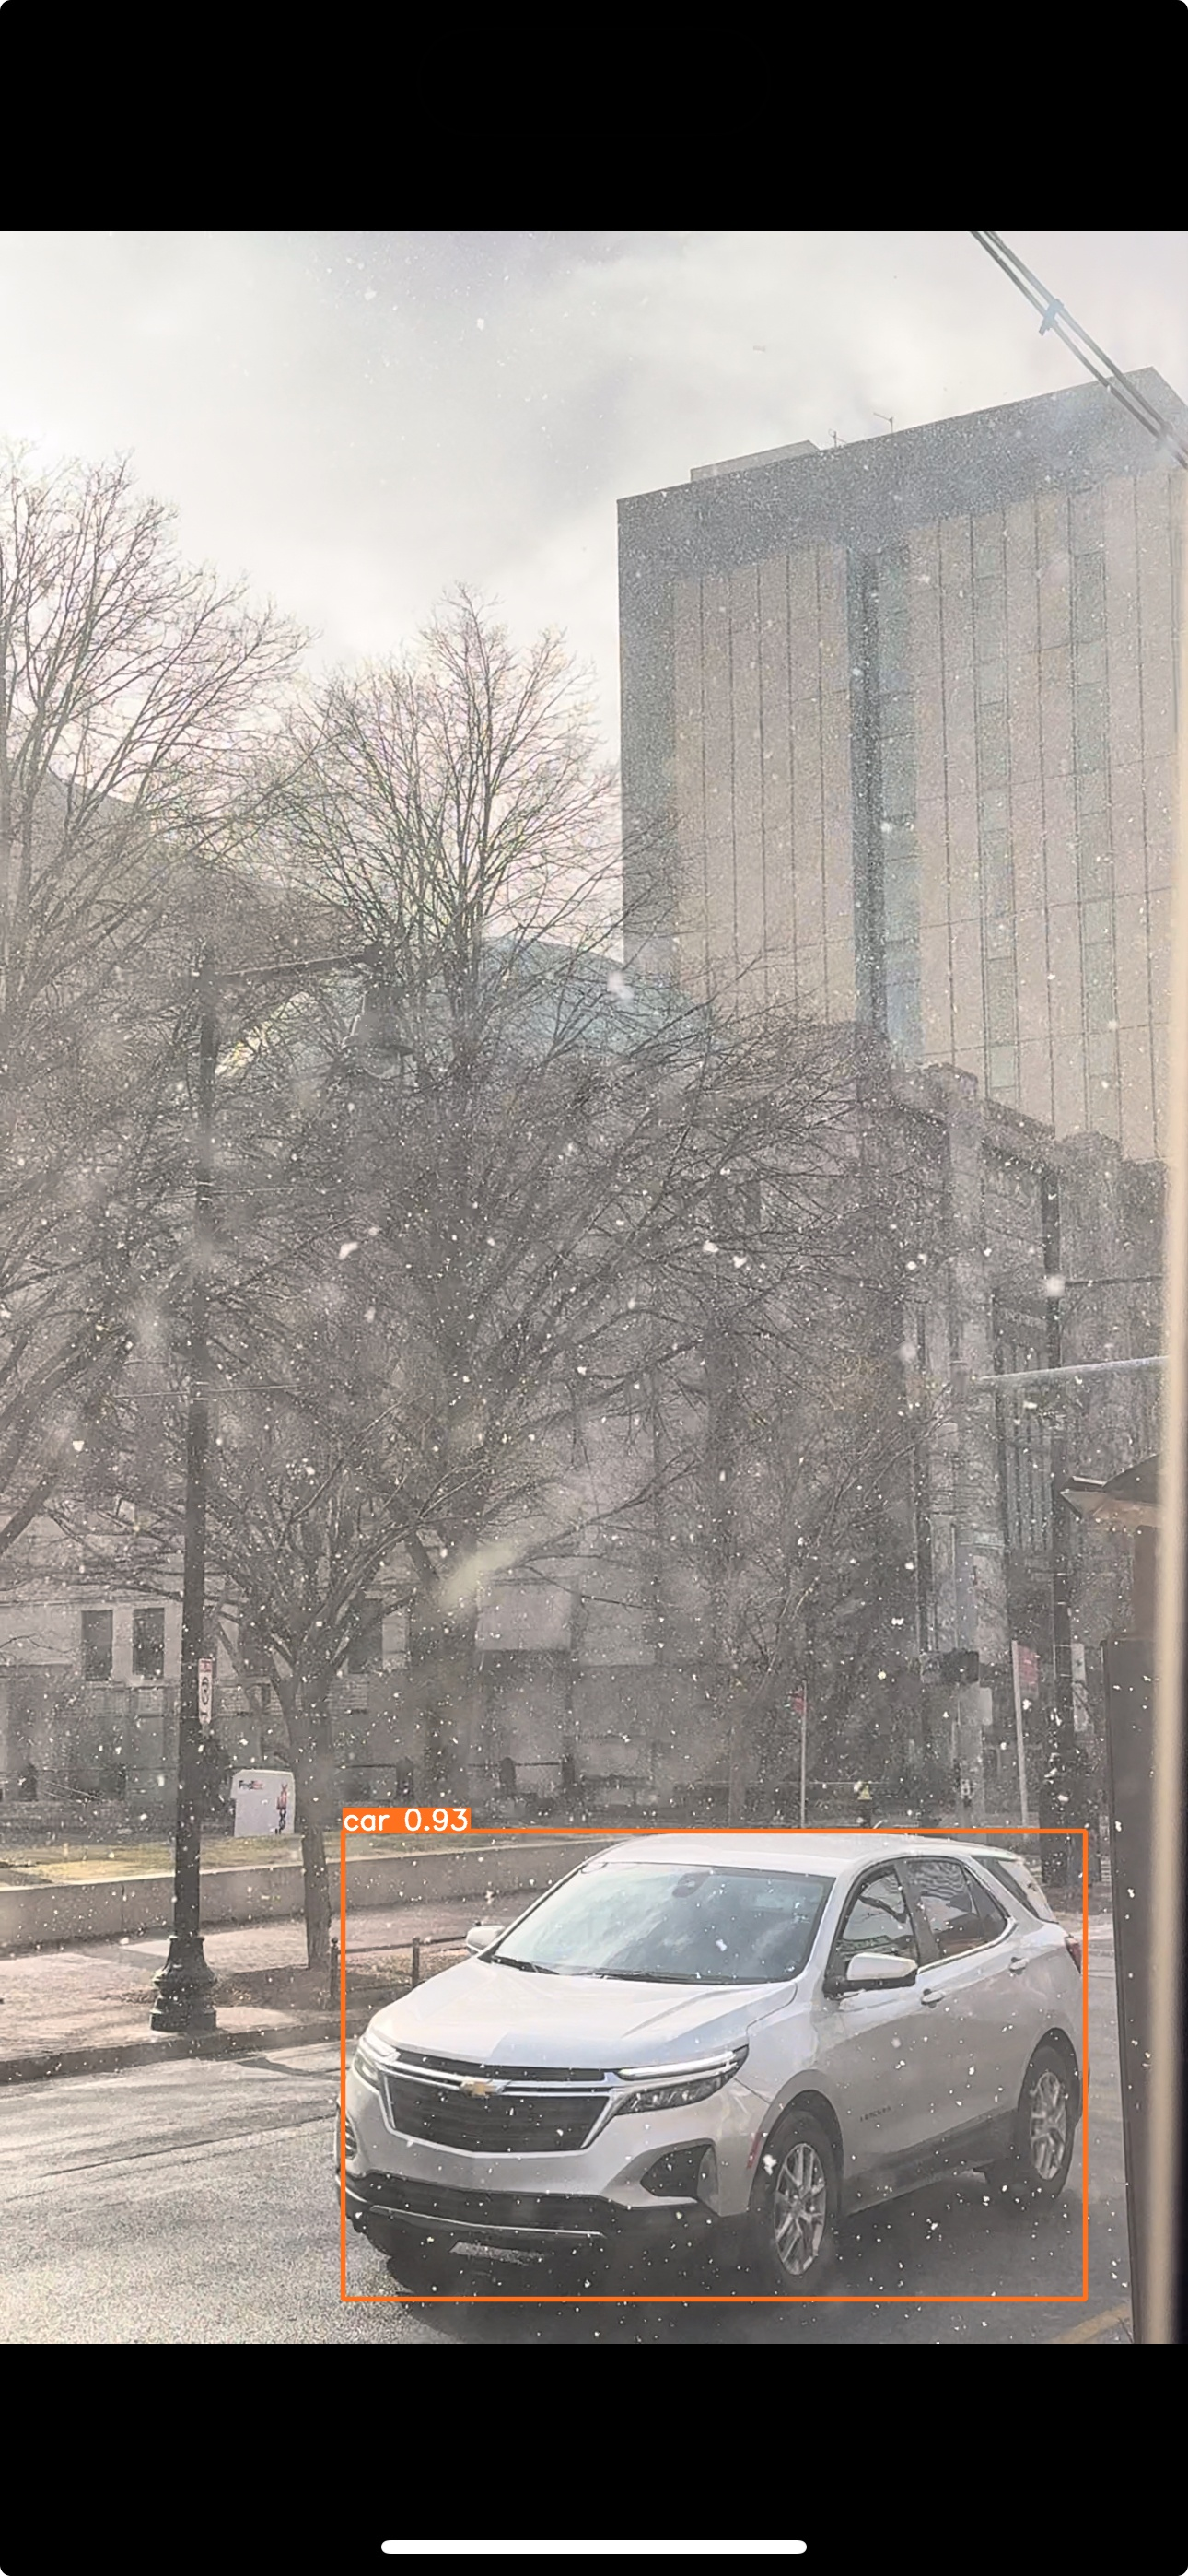

In [49]:
Image(filename = "/kaggle/working/yolov5/runs/detect/exp6/View recent photos 2.jpeg", width = 800, height = 800, retina = False, embed = True)